In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd         
   
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('housing.csv')

rows,columns= df.shape
print("Rows:",rows)
print("Columns:",columns)
df

Rows: 20640
Columns: 10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [3]:
numeric_data = df.select_dtypes(include=[np.number])
mean = numeric_data.mean()
median = numeric_data.median()
standard_deviation = numeric_data.std()
numeric_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Figure size 1000x600 with 0 Axes>

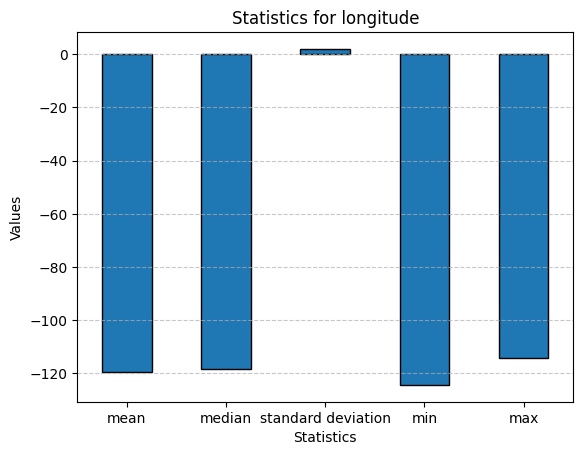

<Figure size 1000x600 with 0 Axes>

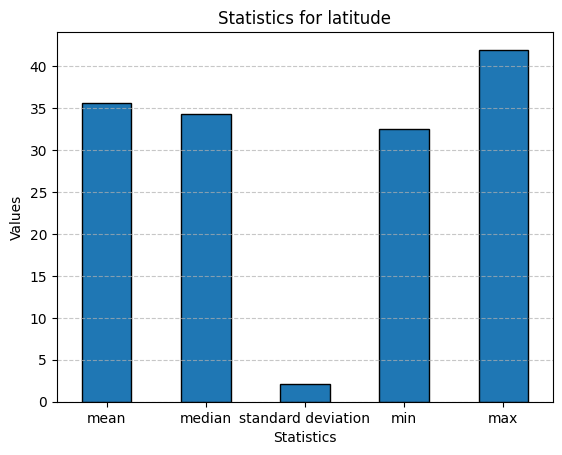

<Figure size 1000x600 with 0 Axes>

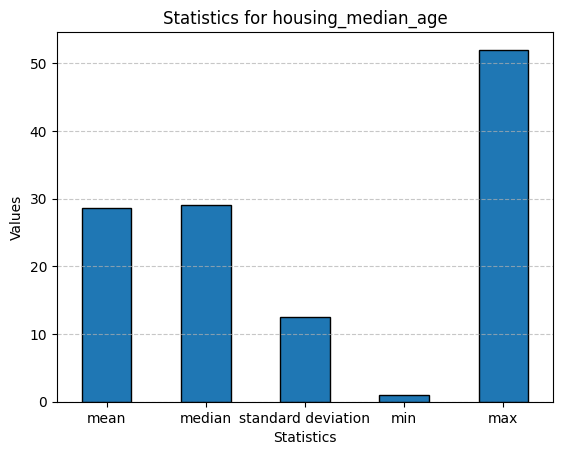

<Figure size 1000x600 with 0 Axes>

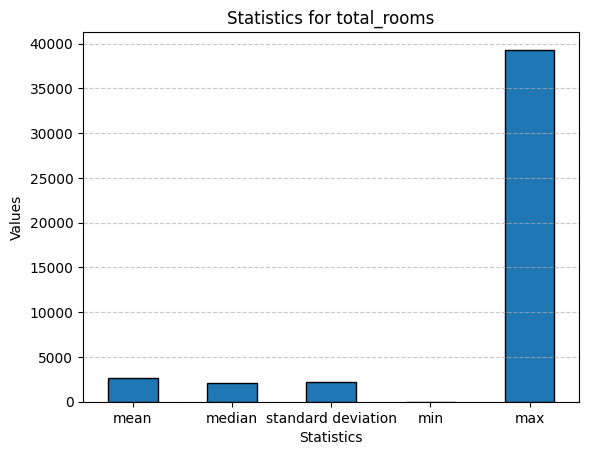

<Figure size 1000x600 with 0 Axes>

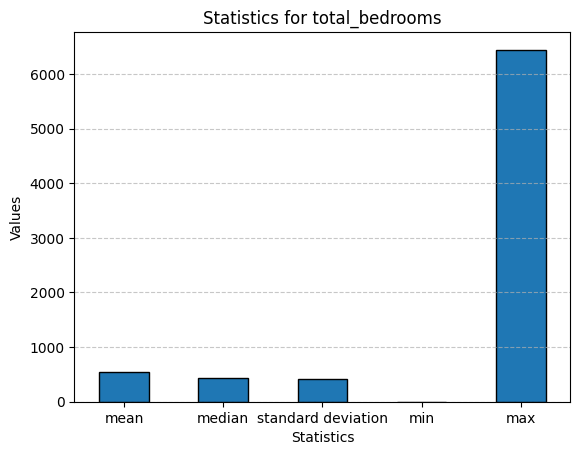

<Figure size 1000x600 with 0 Axes>

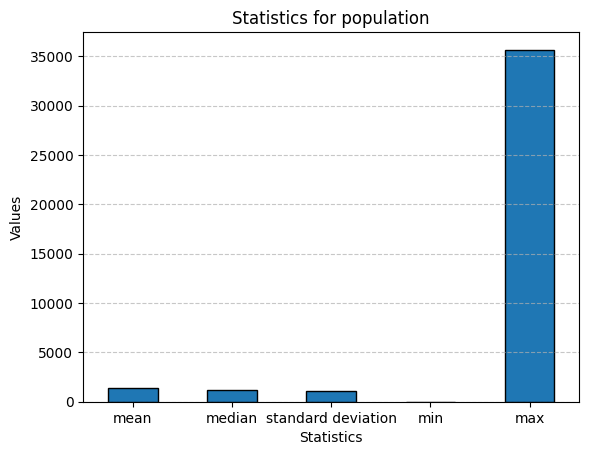

<Figure size 1000x600 with 0 Axes>

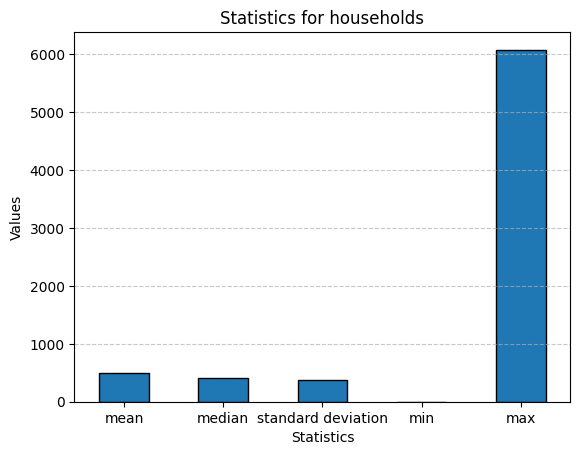

<Figure size 1000x600 with 0 Axes>

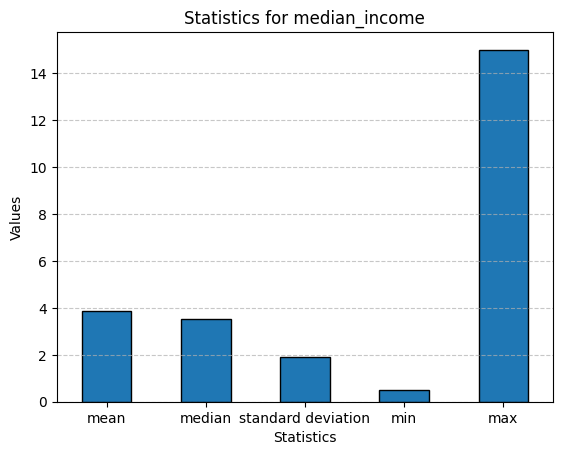

<Figure size 1000x600 with 0 Axes>

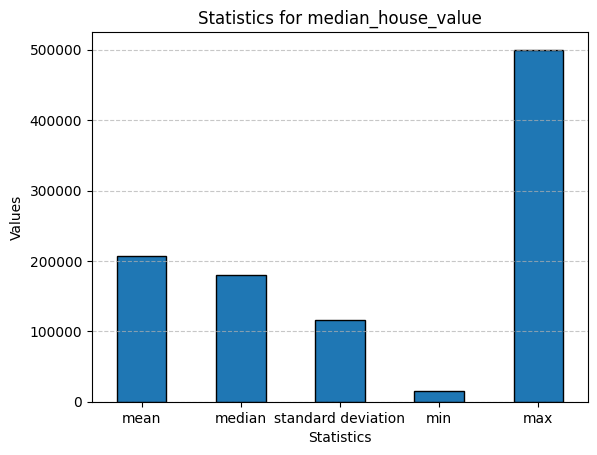

In [4]:




for column in numeric_data.columns:
    stats={
        'mean':numeric_data[column].mean(),
        'median':numeric_data[column].median(),
        'standard deviation':numeric_data[column].std(),
        'min':numeric_data[column].min(),
        'max':numeric_data[column].max()
    }
    
    stats_df = pd.DataFrame(stats, index=[0])
    stats_df = pd.DataFrame(stats, index=[0])
    
    # Plotting
    plt.figure(figsize=(10, 6))
    stats_df.T.plot(kind='bar', legend=False, edgecolor='black')
    plt.title(f'Statistics for {column}')
    plt.xlabel('Statistics')
    plt.ylabel('Values')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    

In [5]:
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
columns_with_missing = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:")
print(columns_with_missing)
print(missing_values)

Columns with missing values:
['total_bedrooms']
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
def plot(df):
    # Assuming columns_with_missing is a list of column names with missing values
    
    
    for column in columns_with_missing:
        df[column].plot(kind='hist', bins=20, edgecolor='black')
        plt.title(f'{column} histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    
    


BEFORE replacing Missing Values

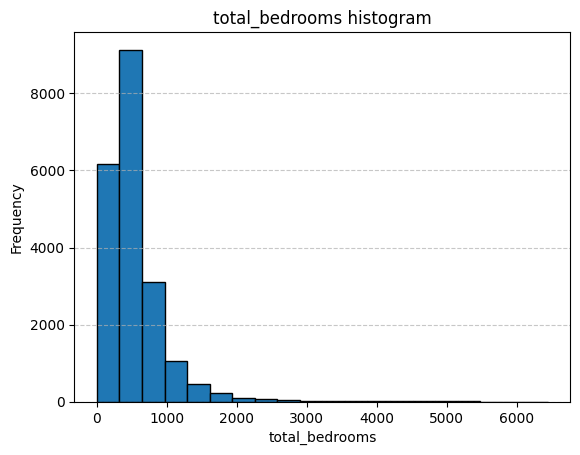

In [7]:
plot(df)

In [9]:
columns_with_missing_1 = df.columns[df.isnull().any()]

for column in columns_with_missing_1:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)
    


In [10]:
missing_values =df.isnull().sum()
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


After repacling missing values

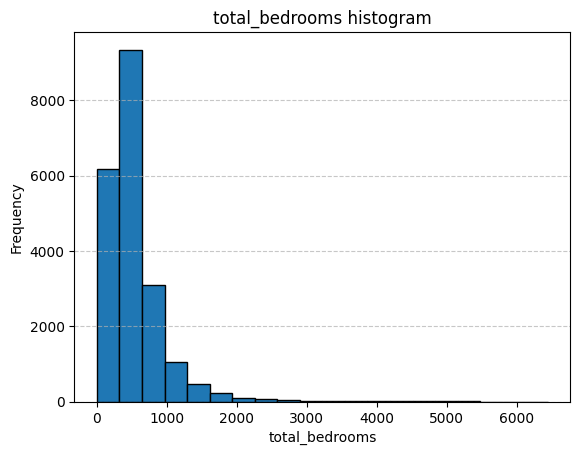

In [11]:
plot(df)

In [12]:
df = df.drop_duplicates()

In [13]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


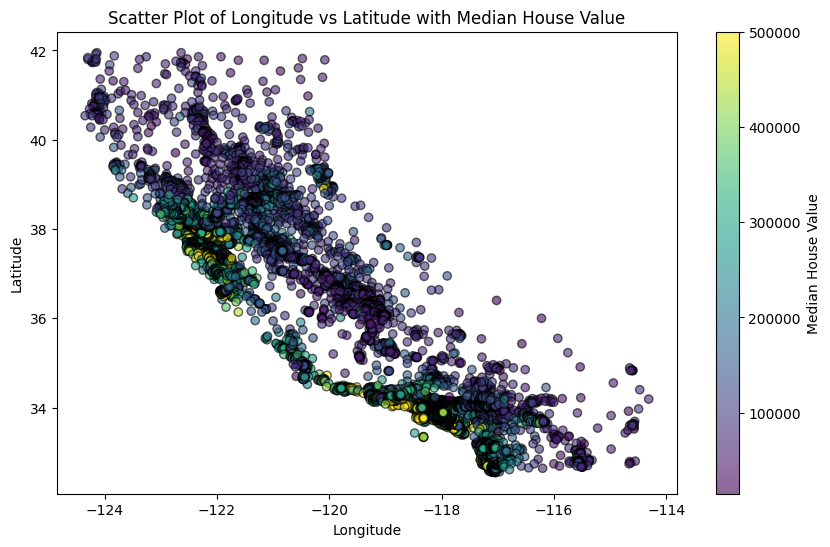

In [14]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.6, edgecolor='k')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value')

# Label axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a descriptive title
plt.title('Scatter Plot of Longitude vs Latitude with Median House Value')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Relationship Between Median Income and Median House Value')

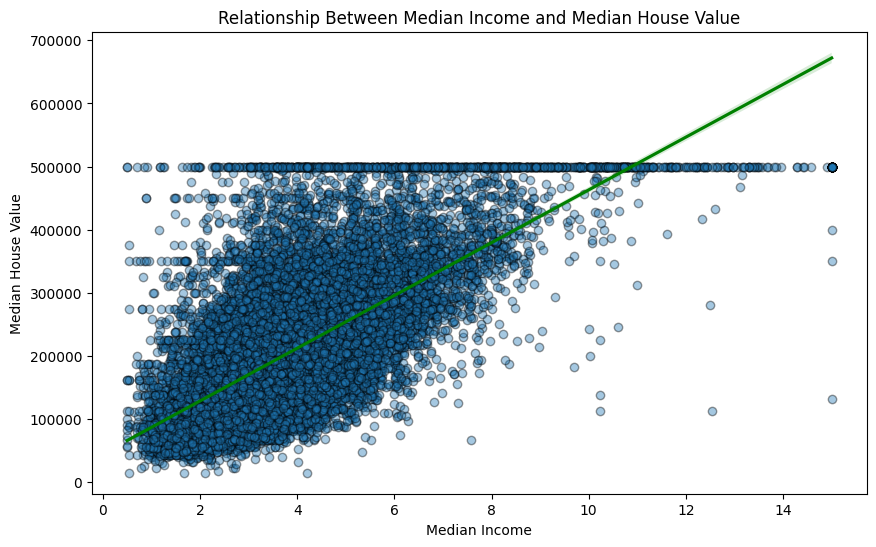

In [18]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(x='median_income', y='median_house_value', data=df, scatter_kws={'alpha':0.4, 'edgecolor':'k'}, line_kws={'color':'green'})

# Label axes
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Add a descriptive title
plt.title('Relationship Between Median Income and Median House Value')


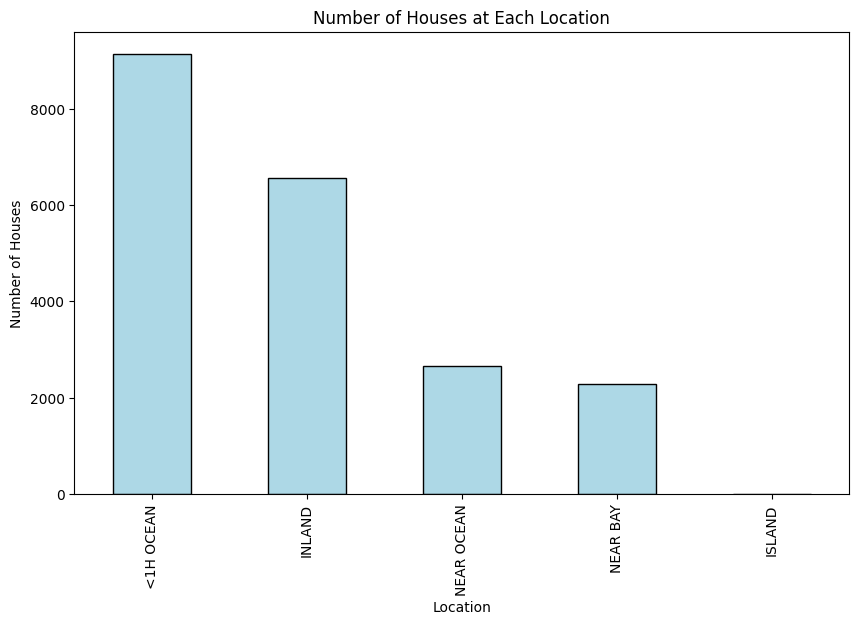

In [23]:
location_counts = df['ocean_proximity'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Label axes
plt.xlabel('Location')
plt.ylabel('Number of Houses')

# Add a descriptive title
plt.title('Number of Houses at Each Location')

# Show the plot
plt.show()



In [28]:
# 1. Grouping the data by ocean_proximity and calculating summary statistics
grouped_stats = df.groupby('ocean_proximity').describe()

# Displaying the summary statistics
grouped_stats

longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND          -118.3200 -118.32      5.0  33.358000  ...      2.833300   
NEAR BAY        -122.1400 -122.01   2290.0  37.801057  ...      5.054425   
NEAR OCEAN      -117.1825 -116.97   2658.0  34.738439  ...      4.837400   

                         median_house_value                                \
                     max              count           mean            std   
ocean_proximity                                                             
<1H OCEAN        15.0001             9136.0  240084.285464  106124.292213   
INLAND           15.0001             6551.0  124805.392001   70007.908494   
ISLAND            3.3906                5.0  380440.000000   80559.561816   
NEAR BAY         15.0001             2290.0  259212.311790  122818.537064   
NEAR OCEAN       15.0001             2658.0  249433.977427  122477.145927   

                                                                   
                      min       25%       50%       75%       max  
ocean_proximity                                                    
<1H OCEAN         17500.0  164100.0  214850.0  289100.0  500001.0  
INLAND            14999.0   77500.0  108500.0  148950.0  500001.0  
ISLAND           287500.0  300000.0  414700.0  450000.0  450000.0  
NEAR BAY          22500.0  162500.0  233800.0  345700.0  500001.0  
NEAR OCEAN        22500.0  150000.0  229450.0  322750.0  500001.0  

[5 rows x 72 columns]

C:\Users\dell\AppData\Local\Temp\ipykernel_9088\3268820597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')


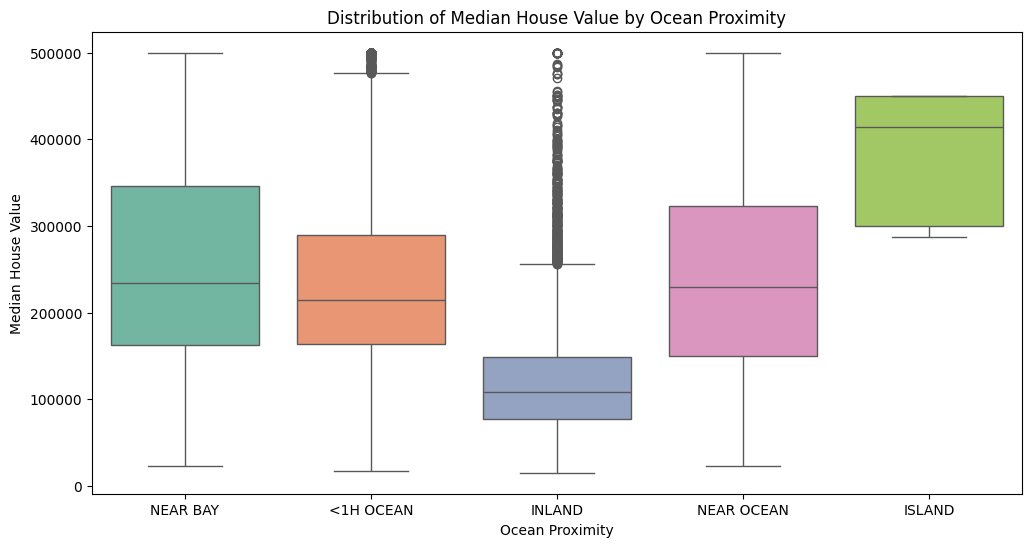

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

In [30]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

In [31]:
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False
